# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframes

In [2]:
# Setting Variables
path = r'C:\Users\Saikat Halder\Documents\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis 01182024'
# Importing Merged Dataframe
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_all_dataframes_new_variables_agg_variable.pkl'))

In [3]:
# Verifying Dataframe
df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,reordered,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_reorder,order_frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,0,Mid range products,Regulary busy,Most orders,32,Regular customer,20.0,High spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,Mid range products,Regulary busy,Most orders,32,Regular customer,20.0,High spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,0,Mid range products,Busiest days,Average orders,5,New customer,18.5,High spender,6.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,0,Mid range products,Slowest days,Most orders,3,New customer,14.0,High spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,1,Mid range products,Slowest days,Most orders,3,New customer,14.0,High spender,9.0,Frequent customer


# Bar Chart

<Axes: xlabel='order_day_of_week'>

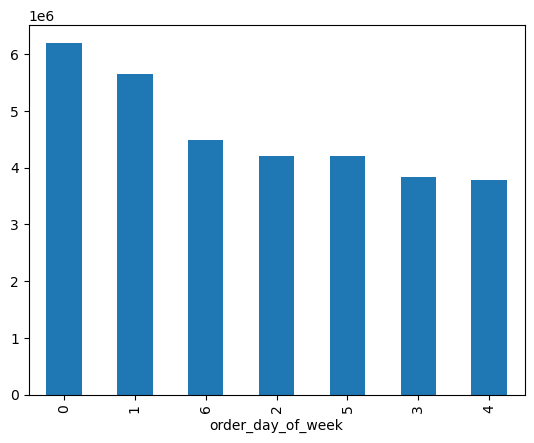

In [4]:
# Creating Bar Chart for orders_day_of_week
df_ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

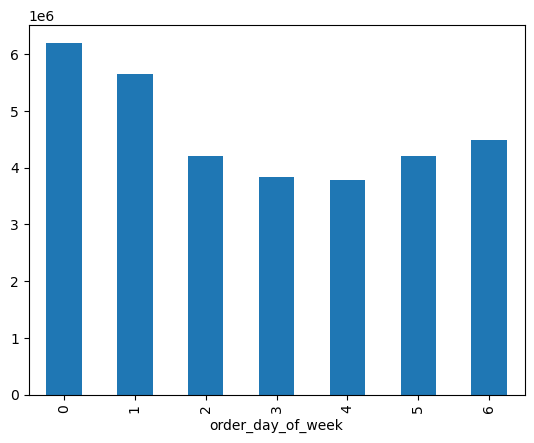

In [5]:
# With Sorting
df_ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='order_day_of_week'>

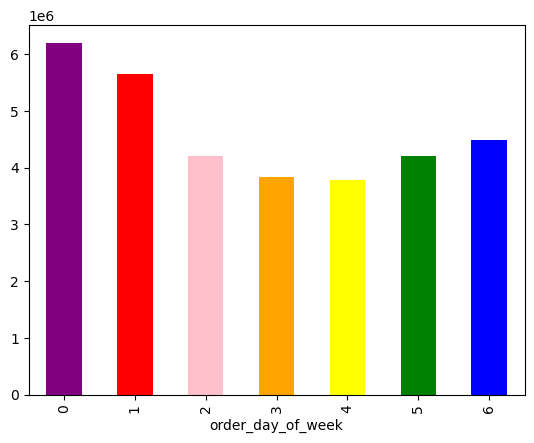

In [6]:
# With Color
df_ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

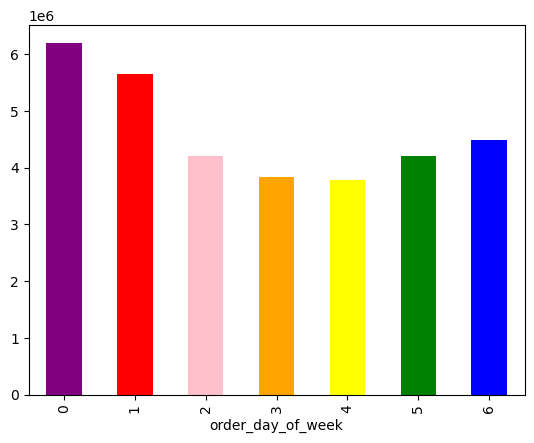

In [7]:
# Assining a variable
bar = df_ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

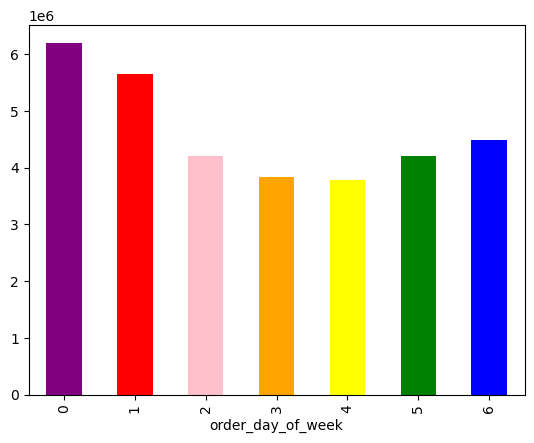

In [8]:
# Calling the variable(bar)

bar.figure

In [9]:
# Exporting the chart as an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histogram

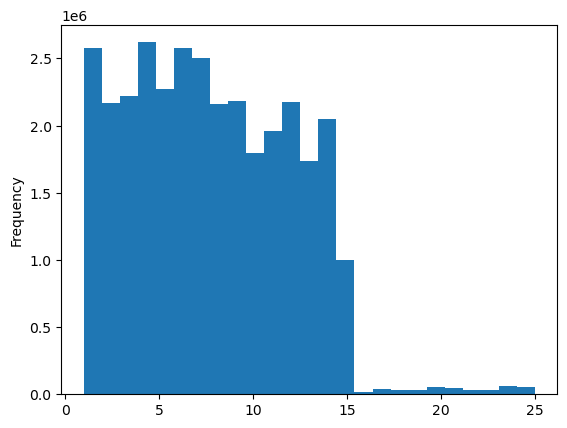

In [10]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

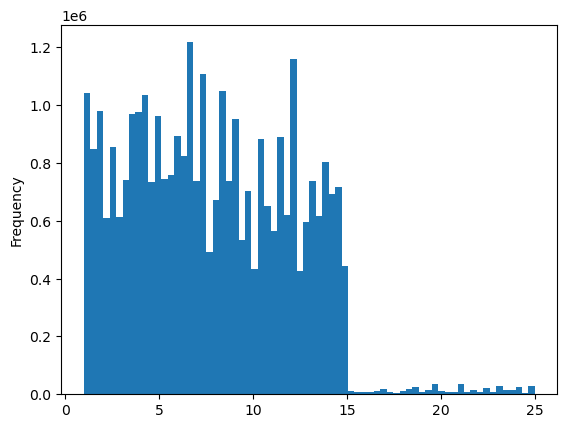

In [11]:
# Changing the bins size to get more granularity
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)
# Increasing the number of bins will allow us to see more variety in our histogram

In [12]:
# Exporting Histogram to an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

# Scatterplot

In [13]:
# scatterplot() function is in the seaborn library
# sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merge)

# Sampling Data

## Creating a list in the form of boolean values for 70:30 split

In [20]:
# Set the seed for the random number generator
np.random.seed(4) # The seed represents a random but reproducible pattern.
# Create 32404859 random numbers(length of the dataframe)
    #np.random.rand(len(df_ords_prods_merge))
# Code a logical test comaring each of those numbers to a value of 0.70
    #np.random.rand(len(df_ords_prods_merge))<0.70
# Store the results of the test in a new list, dev, in the form of boolean values.
dev = np.random.rand(len(df_ords_prods_merge))<0.70

In [21]:
#Verifying list
dev

array([False,  True, False, ...,  True,  True,  True])

## Split the dataframe into two samples

In [23]:
# Store 70% of the sample in the dataframe big
big =  df_ords_prods_merge[dev] # Stores data which has a True Value in dev
#Store 30% if the sample in the dataframe small
small =  df_ords_prods_merge[~dev] # Store data which has a false value in dev

In [25]:
# Verifying if the dataframe splitting was correct
x=len(df_ords_prods_merge)
y= len(big) + len(small)

if x == y:
    print('The dataframe splitting was correct!')
else:
    print('Something is wrong! Please look at the logic again')

The dataframe splitting was correct!


## Creating a subset with two columns only -  'order_day_of_week', 'prices'

In [26]:
df_small = small[['order_day_of_week', 'prices']] 

In [27]:
# Verifying new dataframe
df_small.head()

,order_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


# Line Charts

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


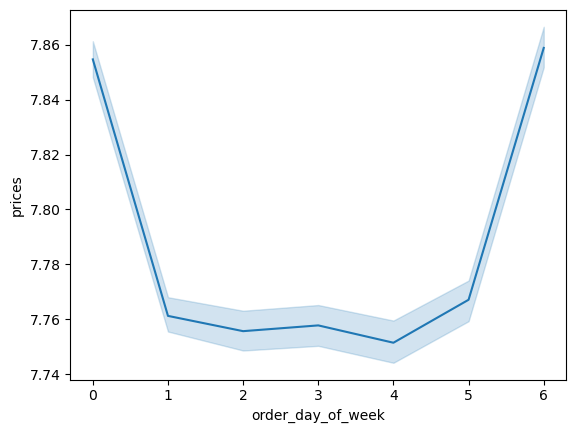

In [28]:
# Development of the 'prices' column across the days of the week.
# We will plot the 'order_day_of_week' column on the x-axis and the 'prices' column on the y axis
line = sns.lineplot(data = df_small, x= 'order_day_of_week', y = 'prices')
